# Random Forests

To implement this strategy, we need to build many decision trees. Each tree should do an acceptable job of predicting the target, and should also be different from the other trees. Random forests get their name from injecting randomness into the tree building to ensure each tree is different.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import make_moons

To make a prediction using the random forest, the algorithm first makes a prediction for every tree in the forest. For regression, we can average these results to get our final prediction. For classification, a “soft voting” strategy is used. This means each algorithm makes a “soft” prediction, providing a probability for each possible output label. The probabilities predicted by all the trees are averaged, and the class with the highest probability is predicted.

Let's apply a random forest consisting of five trees.

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [23]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)

In [24]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [25]:
print('Accuracy on the training set : {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test set : {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on the training set : 0.960
Accuracy on the test set : 0.920


### Let’s apply a random forest consisting of 100 trees on the Breast Cancer dataset


In [32]:
from sklearn.datasets import load_breast_cancer

In [33]:
cancer = load_breast_cancer()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


The random forest gives us an accuracy of 97%, better than a single decision tree, without tuning any parameter. We could adjust the max_fea tures setting, or apply pre-pruning as we did for the single decision tree. However, often the default parameters of the random forest already work quite well.


Similarly to the decision tree, the random forest provides feature importances, which are computed by aggregating the feature importances over the trees in the forest. Typically, the feature importances provided by the random forest are more reliable than the ones provided by a single tree.


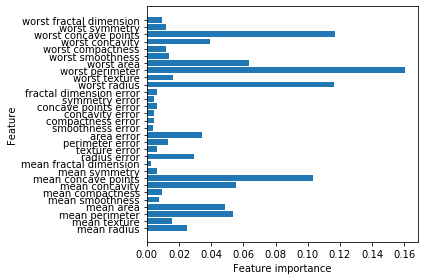

In [40]:
def plot_feature_importances_cancer(model): 
    n_features = cancer.data.shape[1]   
    plt.barh(range(n_features), model.feature_importances_, align='center')    
    plt.yticks(np.arange(n_features), cancer.feature_names)    
    plt.xlabel("Feature importance")    
    plt.ylabel("Feature")
    plt.tight_layout()
plot_feature_importances_cancer(forest)

As you can see, the random forest gives nonzero importance to many more features than the single tree. Similarly to the single decision tree, the random forest also gives a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” to be the most informative feature overall.